In [156]:
import pandas as pd
pd.__version__

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [157]:
spotify2010 = pd.read_csv("spotifysongscsvs/2010.csv", index_col = 'Unnamed: 0')
spotify2011 = pd.read_csv("spotifysongscsvs/2011.csv", index_col = 'Unnamed: 0')
spotify2012 = pd.read_csv("spotifysongscsvs/2012.csv", index_col = 'Unnamed: 0')
spotify2013 = pd.read_csv("spotifysongscsvs/2013.csv", index_col = 'Unnamed: 0')
spotify2014 = pd.read_csv("spotifysongscsvs/2014.csv", index_col = 'Unnamed: 0')
spotify2015 = pd.read_csv("spotifysongscsvs/2015.csv", index_col = 'Unnamed: 0')
spotify2016 = pd.read_csv("spotifysongscsvs/2016.csv", index_col = 'Unnamed: 0')
spotify2017 = pd.read_csv("spotifysongscsvs/2017.csv", index_col = 'Unnamed: 0')
spotify2018 = pd.read_csv("spotifysongscsvs/2018.csv", index_col = 'Unnamed: 0')
spotify2019 = pd.read_csv("spotifysongscsvs/2019.csv", index_col = 'Unnamed: 0')



In [158]:
#https://www.datacamp.com/tutorial/joining-dataframes-pandas
all_top_songs = pd.concat([spotify2010, spotify2011, spotify2012, spotify2013, spotify2014, spotify2015, spotify2016, spotify2017, spotify2018, spotify2019])


In [159]:
#https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
#https://stackoverflow.com/questions/18022845/pandas-index-column-title-or-name
all_top_songs.index.name = 'id'

In [160]:
all_top_songs.shape

(603, 14)

In [161]:
all_top_songs.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
id,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [162]:
all_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [163]:
#Base data for sum of numerical values grouped by 'title'
sum_by_title_all_years = all_top_songs.groupby('title').sum()

## 1. What is the most popular song in the dataset?

In [164]:
top_pop_list = sum_by_title_all_years[['pop']].nlargest(n=5, columns='pop')
print(top_pop_list)

top_pop_song = top_pop_list.index[0]

pop_song_artist = all_top_songs[all_top_songs['title'] == top_pop_song]
print(pop_song_artist[['artist']].values[0][0])


                                         pop
title                                       
The Hills                                168
Love Yourself                            166
Just the Way You Are                     156
Stitches                                 156
We Are Never Ever Getting Back Together  150
The Weeknd


### The most popular song during the 2011-2019 time period is 'The Hills' by The Weeknd

## 2. What artist has the most songs in the dataset?

In [165]:
no_duplicate_songs = all_top_songs.drop_duplicates(subset='title', keep='first')

no_duplicate_songs[['artist', 'title']].groupby('artist').size().nlargest()

artist
Katy Perry       17
Rihanna          15
Justin Bieber    14
Lady Gaga        14
Maroon 5         14
dtype: int64

### Katy Perry has the most songs in the dataset.

## 3. What is the most popular genre of music in the dataset?

In [166]:
sum_by_genre_all_years = all_top_songs.groupby('top genre').sum()
print(sum_by_genre_all_years[['pop']].nlargest(n=5, columns='pop'))

                pop
top genre          
dance pop     21047
pop            4490
canadian pop   2456
boy band       1045
electropop     1007


### Dance Pop is the most popular genre of music.

## 4. Are there any songs in the dataset more than once?

In [167]:
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
# Selecting duplicate rows based colulmn
duplicates = all_top_songs[all_top_songs.duplicated(subset='title', keep='first')]
 
print(duplicates[['title']])
print('')
print(len(duplicates))

                                               title
id                                                  
55                              Just the Way You Are
65                                         Marry You
94          Written in the Stars (feat. Eric Turner)
96           Castle Walls (feat. Christina Aguilera)
153          We Are Never Ever Getting Back Together
240  A Little Party Never Killed Nobody (All We Got)
296                                            Hello
323                                            Sugar
364                                        The Hills
365                                    Love Yourself
379                                         Stitches
397                                          Company
404                            Runnin' (Lose It All)
405                                             Here
474                                        All I Ask
511                                        I Like It
542                                    Say Som

### There are 19 songs in the dataset more than once.

## 5. Is there a relationship between popularity and danceability?

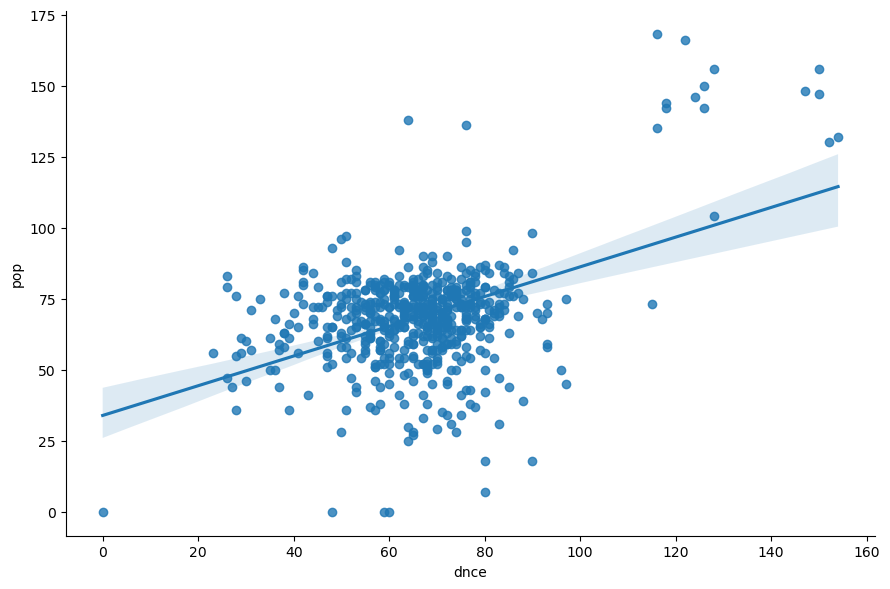

In [168]:
#https://stackoverflow.com/questions/36420908/can-i-draw-a-regression-line-and-show-parameters-using-scatterplot-with-a-pandas
#https://www.geeksforgeeks.org/pandas-scatter-plot-dataframe-plot-scatter/
#https://www.statology.org/seaborn-figure-size/

sns.lmplot(x='dnce', y='pop', data=sum_by_title_all_years, fit_reg=True, height=6, aspect=1.5) 


### There is a positive correlation between popularity and danceability. An increase in popularity can be seen as danceability increases. 

## 6. Does having a higher bpm lead to having a higher energy score?

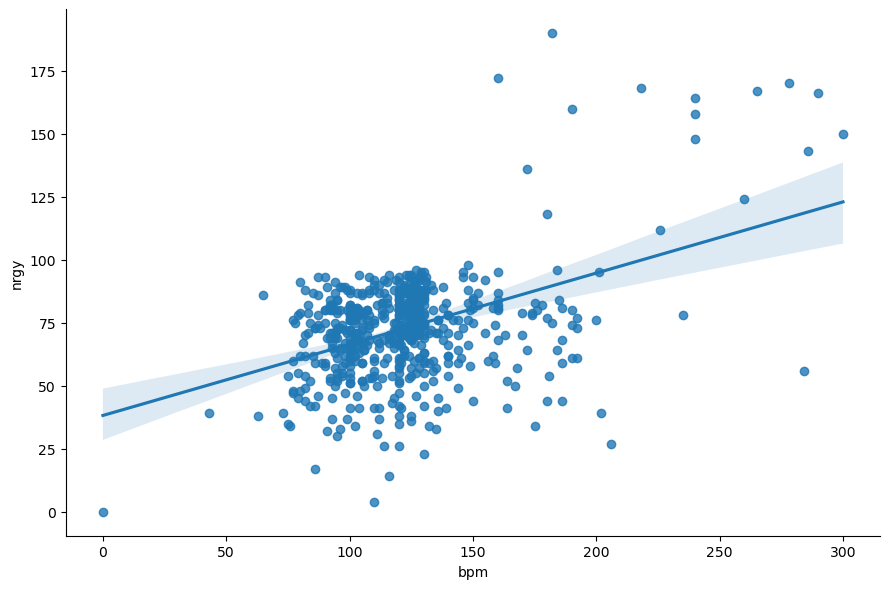

In [169]:
#https://stackoverflow.com/questions/36420908/can-i-draw-a-regression-line-and-show-parameters-using-scatterplot-with-a-pandas
#https://www.geeksforgeeks.org/pandas-scatter-plot-dataframe-plot-scatter/
#https://www.statology.org/seaborn-figure-size/

sns.lmplot(x='bpm', y='nrgy', data=sum_by_title_all_years, fit_reg=True, height=6, aspect=1.5) 


### There is a positive correlation between BPM and energy. An increase in energy can be seen as BPM increases. 

## 7. Which genre has the highest energy score?

In [170]:
sum_by_genre_all_years = all_top_songs.groupby('top genre').sum()
print(sum_by_genre_all_years[['nrgy']].nlargest(n=5, columns='nrgy'))

                nrgy
top genre           
dance pop      23814
pop             4098
canadian pop    2316
boy band        1204
barbadian pop   1027


### "Dance pop" is the genre with the highest energy score.